<a href="https://colab.research.google.com/github/Princechaurasiya045/Contact_form/blob/main/Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
# Pandas for data manipulation, Scikit-learn for modeling, Matplotlib/Seaborn for visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  # We'll use Linear Regression as the model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load the dataset from the uploaded CSV file
# Assume the CSV has columns like 'brand', 'model', 'year', 'mileage', 'horsepower', 'fuel_type', 'transmission', 'price'
# Adjust column names if your dataset differs
file_path = '/content/car data.csv'  # Replace with your file name if different
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Step 3: Data Preprocessing
# Handle missing values: Fill numerical with mean, categorical with mode
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('Selling_Price', errors='ignore')  # Exclude target 'Selling_Price'
categorical_cols = data.select_dtypes(include=['object']).columns

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Feature Engineering: Example - Create a new feature 'age' from 'year'
if 'Year' in data.columns:
    current_year = 2025  # Assuming current year is 2025
    data['age'] = current_year - data['Year']
    numerical_cols = numerical_cols.append(pd.Index(['age']))  # Add to numerical cols

# Handle brand goodwill: We'll treat 'brand' as categorical and encode it (implicitly captures goodwill)
# Drop unnecessary columns if present (e.g., 'model' if too many unique values, to avoid high dimensionality)
if 'Car_Name' in data.columns and data['Car_Name'].nunique() > 50:  # Arbitrary threshold
    data = data.drop('Car_Name', axis=1)  # Drop if too many unique models

# Update categorical_cols after potentially dropping 'Car_Name'
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
# Step 4: Split features and target
# Assume 'price' is the target column; change if different
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [ ]:
# Step 5: Preprocessing Pipeline
# One-hot encode categorical features, scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

In [ ]:
# Step 6: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Create and train the model pipeline
# Using Linear Regression for simplicity; you can swap with RandomForestRegressor for better performance
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Fuel_Type', 'Selling_type', 'Transmission'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
# Step 8: Model Evaluation
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 3.4813498305118555
Root Mean Squared Error (RMSE): 1.8658375680942474
R-squared (R2): 0.8488707839193137


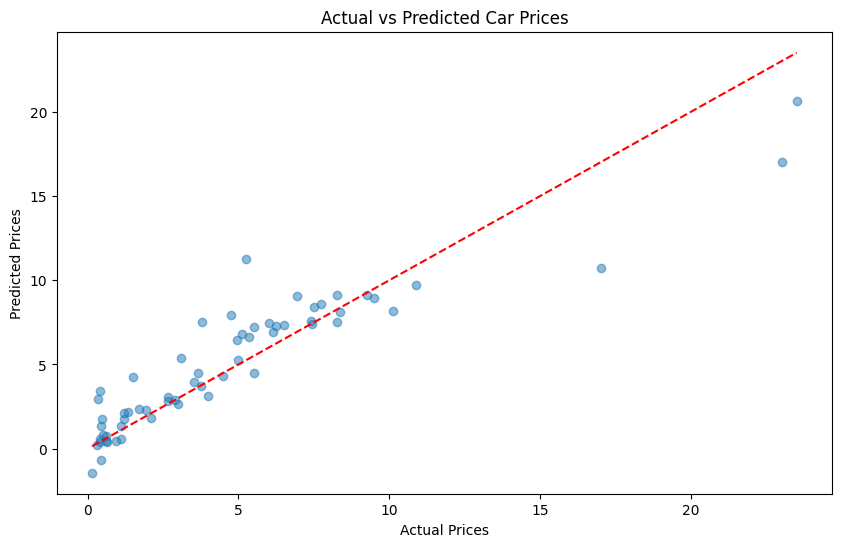

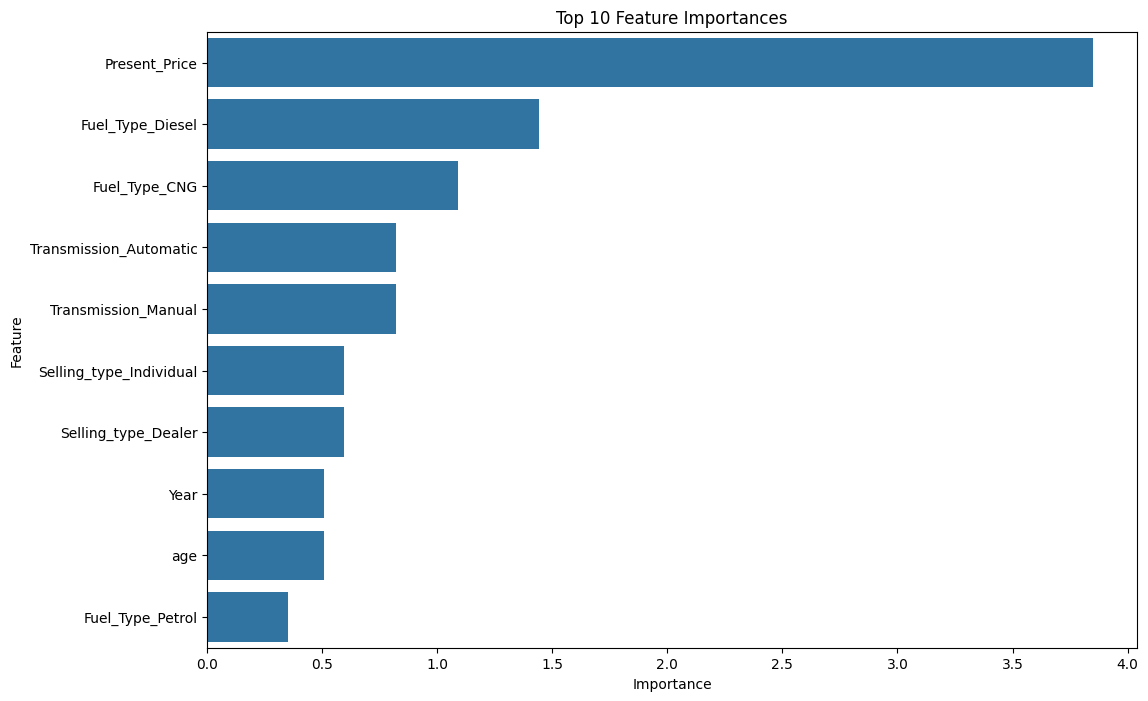

In [ ]:
# Step 9: Visualizations
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Feature Importance (for Linear Regression, use coefficients)
# Extract feature names after preprocessing
feature_names = (numerical_cols.tolist() +
                 model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist())

coefficients = model.named_steps['regressor'].coef_

# Plot top 10 feature importances (absolute coefficients)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
# Step 10: Real-world Applications (Printed Explanation)
print("\nReal-world Applications of Machine Learning in Price Prediction:")
print("- Automotive Industry: Dealers use models to set competitive prices based on market trends, features, and condition.")
print("- E-commerce Platforms: Sites like Carvana or AutoTrader predict resale values for listings.")
print("- Insurance: Companies estimate vehicle values for claims and premiums.")
print("- Finance: Banks predict car loan defaults by valuing collateral.")
print("- Consumer Tools: Apps help buyers negotiate by estimating fair market prices.")


Real-world Applications of Machine Learning in Price Prediction:
- Automotive Industry: Dealers use models to set competitive prices based on market trends, features, and condition.
- E-commerce Platforms: Sites like Carvana or AutoTrader predict resale values for listings.
- Insurance: Companies estimate vehicle values for claims and premiums.
- Finance: Banks predict car loan defaults by valuing collateral.
- Consumer Tools: Apps help buyers negotiate by estimating fair market prices.
